In [101]:
import sys
print(sys.version)
assert sys.version_info >= (3, 6)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


3.8.5 | packaged by conda-forge | (default, Aug 21 2020, 18:21:27) 
[GCC 7.5.0]


## Data Structures in Numpy 

* Numpy is a package that provides
    - A N-dimensional array object (tensors)
    - Indexing and slicing
    - Vectorized operations
    - Broadcasting
    - Linear Algebra functions
    - Random number generation functions
    - Descriptive statistics functions
    
Numpy reference: https://docs.scipy.org/doc/numpy-1.13.0/reference/index.html

### Numpy N-dimensionsal Arrays (tensors)

Numpy basics: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.creation.html

* A tensor is defined by 3 attributes
    - ndim: Number of axes (dimensionality of tensor) (often called the rank of the tensor)
    - shape: tuple of integers containing number of dimensions along each axis
    - dtype: the type of data contained in the tensor
    
Note:  Dimensionality can denote either the number of entries along a specific axis or the number of axes in a tensor(i.e. the number of direction required to describe it)

In [102]:
def pr_attr(v):
    print(f"Class: {type(v)}, \nNumber of axes: {v.ndim}, \nShape: {v.shape}, \nData type: {v.dtype}")

#### Creating N-dimensionsal Arrays

In [103]:
# Scalars (0 dimensional tensors)
np.ndim(5),np.shape(5)

(0, ())

In [104]:
# Vectors (1 dimensional tensor)

## Create vector from a list ot tuple
v = np.array([1,2,3]) 
print(v)

pr_attr(v)


[1 2 3]
Class: <class 'numpy.ndarray'>, 
Number of axes: 1, 
Shape: (3,), 
Data type: int64


In [105]:
w = np.array((1,2,3,4));w

array([1, 2, 3, 4])

In [106]:
## Built-in Methods
z = np.zeros(10)
o = np.ones(10)
print(z)
print(o)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [107]:
# Sequences

r = np.arange(2,10,2)
x = np.linspace(0,10,20)
r,x

(array([2, 4, 6, 8]),
 array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
         2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
         5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
         7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ]))

In [108]:
# Difference between vector and 2 dimensional array with 1- column
v=np.array([1,2,3])
print("v\n",v)
pr_attr(v)
w = v.reshape(3,1) # 3 rows, 1 column
print("w\n",w)
pr_attr(w)

v
 [1 2 3]
Class: <class 'numpy.ndarray'>, 
Number of axes: 1, 
Shape: (3,), 
Data type: int64
w
 [[1]
 [2]
 [3]]
Class: <class 'numpy.ndarray'>, 
Number of axes: 2, 
Shape: (3, 1), 
Data type: int64


In [109]:
# Matrices (2 dimensional tensor)

v = np.arange(10)
M1 = v.reshape(2,5)  # reshape 1-d array
print(M1)
M2 = np.array([[1,2,3],[4,5,6]]) # List of lists
M2

[[0 1 2 3 4]
 [5 6 7 8 9]]


array([[1, 2, 3],
       [4, 5, 6]])

In [110]:
pr_attr(M2)


Class: <class 'numpy.ndarray'>, 
Number of axes: 2, 
Shape: (2, 3), 
Data type: int64


In [111]:
# Idendity Matrix
I = np.eye(4);I

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [112]:
# 3 dimensionsal tensors

T3 = np.array([[[1,2,3,4],   # Stacked 2-d tensor (3 leading [[[)
               [5,6,7,8]],
              [[4,3,2,1],
               [8,7,6,5]],
              [[10,11,12,13],
               [14,15,16,17]]])
print("T3\n",T3)
pr_attr(T3)



T3
 [[[ 1  2  3  4]
  [ 5  6  7  8]]

 [[ 4  3  2  1]
  [ 8  7  6  5]]

 [[10 11 12 13]
  [14 15 16 17]]]
Class: <class 'numpy.ndarray'>, 
Number of axes: 3, 
Shape: (3, 2, 4), 
Data type: int64


#### Indexing

In [113]:
# Bracket Indexing

print(f'v \n{v} \n M1 \n{M1} \n T3 \n{T3}')

print(v[2]) # vector 1 axes
print(M1[1,3]) # Matrix 2 axes (row, col)
print(T3[2,1,2]) # 3-dimensional 3 axes

v 
[0 1 2 3 4 5 6 7 8 9] 
 M1 
[[0 1 2 3 4]
 [5 6 7 8 9]] 
 T3 
[[[ 1  2  3  4]
  [ 5  6  7  8]]

 [[ 4  3  2  1]
  [ 8  7  6  5]]

 [[10 11 12 13]
  [14 15 16 17]]]
2
8
16


In [114]:
M1[1][3]

8

In [115]:
# : is the slice operator (from:to+1:step)

print(v, v[2:6],v[2:8:2]) 

[0 1 2 3 4 5 6 7 8 9] [2 3 4 5] [2 4 6]


In [116]:
v[2:9:2]

array([2, 4, 6, 8])

In [117]:
print(v>2)

[False False False  True  True  True  True  True  True  True]


In [118]:
print(M1)
M1[:,2:4] # for all rows

[[0 1 2 3 4]
 [5 6 7 8 9]]


array([[2, 3],
       [7, 8]])

In [119]:
# Logical Indexing
print("v\n",v)
print(v[v>2],v[v>3])

v
 [0 1 2 3 4 5 6 7 8 9]
[3 4 5 6 7 8 9] [4 5 6 7 8 9]


In [120]:
# Reshape as a function
v = np.arange(16)
M3 = np.reshape(v,(4,4)) 
print(M3)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


#### ndarray operations

* Vectorized operations: operators applied to whole arrays (elementwise)
    - no loops

In [121]:
a = np.arange(10).reshape(2,5)
print("a\n",a)
(np.sum(a[0,:]),np.prod(a[1,:]),np.sum(a))

a
 [[0 1 2 3 4]
 [5 6 7 8 9]]


(10, 15120, 45)

In [122]:
(np.sqrt(a),np.exp(a))

(array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
        [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ]]),
 array([[1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
         5.45981500e+01],
        [1.48413159e+02, 4.03428793e+02, 1.09663316e+03, 2.98095799e+03,
         8.10308393e+03]]))

In [123]:
M = np.exp(a)
print(M)
np.round(M,decimals=2)

[[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
  5.45981500e+01]
 [1.48413159e+02 4.03428793e+02 1.09663316e+03 2.98095799e+03
  8.10308393e+03]]


array([[1.00000e+00, 2.72000e+00, 7.39000e+00, 2.00900e+01, 5.46000e+01],
       [1.48410e+02, 4.03430e+02, 1.09663e+03, 2.98096e+03, 8.10308e+03]])

In [124]:
arr = np.array([[0.14, 0.18], [0.20, 0.27]])
np.around(arr, decimals=1)

array([[0.1, 0.2],
       [0.2, 0.3]])

#### Random Methods

https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html


#### # Vector of random floats in half open interval[0, 1)

In [125]:
# Vector of random floats in half open interval[0, 1)
v = np.random.random(5) # size = 10
v2 = np.random.sample(5)
print("v\n",v)
print("v2\n",v2)

v
 [0.37540494 0.02581418 0.90653093 0.78641778 0.61931523]
v2
 [0.21158894 0.292304   0.66154467 0.88626098 0.67117646]


#### Reproducible random number generation

In [126]:
# Random Seed
np.random.seed(1234) # some non-negative number

v1 = np.random.random(3)
np.random.seed(1234)
v2 = np.random.random(3)
print("v1\n",v1)
print("v2\n",v2)


v1
 [0.19151945 0.62210877 0.43772774]
v2
 [0.19151945 0.62210877 0.43772774]


#### Vector of random integers 

In [127]:
v = np.random.randint(10,20,5) # from,to (exclusive),size
v

array([18, 19, 11, 17, 19])

#### Random sampling

In [128]:
# 20 rolls of a fair 6-sided dice
rolls = np.random.choice(np.arange(1,7),size = 20)
print(rolls)
rolls = np.random.choice(np.arange(1,7),size = 20,p=(1/2,0,0,1/2,0,0))
print(rolls)

[3 4 5 5 3 3 1 1 5 6 1 2 3 1 4 5 6 3 3 4]
[1 4 1 1 4 4 1 4 1 4 4 1 4 1 4 4 1 4 1 4]


#### Permute a sequence

In [129]:
seq_permuted = np.random.permutation([1,2,3,4]);seq_permuted

array([3, 4, 1, 2])

In [130]:
# Create an array of the given shape and fill with random samples 
r1 = np.random.rand(10) # in half open interval[0, 1) (i.e. Uniform distribution)
r2 = np.random.randn(2,5) # From Normal 
print(r1)
print(r2)
print(r1.shape,r2.shape)

[0.68923564 0.92954594 0.91811655 0.97530172 0.39700197 0.26262609
 0.43015136 0.76453077 0.59973081 0.08094696]
[[-0.83673906  0.50939624 -0.04112391 -0.11190958 -0.75900742]
 [-0.04593598 -0.90772784 -0.27911369  0.24412027  0.36605638]]
(10,) (2, 5)


#### Broadcasting

https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

* How numpy treats arrays of different shapes
* In general, numpy broadcasts the short array to match the larger array
* For an operation on two arrays, their shapes are compared element-wise (starting with the trailing dimensions)
    - Two dimensions are compatible when
        - they are equal
        - one of them is a one

In [131]:
a = np.arange(10)
c = 3.0
print(a)
print(a*c)

[0 1 2 3 4 5 6 7 8 9]
[ 0.  3.  6.  9. 12. 15. 18. 21. 24. 27.]


In [132]:
b = np.arange(5)
print(b)
# print((a + b))

[0 1 2 3 4]


In [133]:
b = b.reshape(5,1)
print(a + b)

[[ 0  1  2  3  4  5  6  7  8  9]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 2  3  4  5  6  7  8  9 10 11]
 [ 3  4  5  6  7  8  9 10 11 12]
 [ 4  5  6  7  8  9 10 11 12 13]]


In [134]:
a = a.reshape(-1,1)
print(a)
print(a.shape,b.shape)
#print(a + b)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
(10, 1) (5, 1)


In [135]:
a=a.reshape((10,))
print(a + b)

[[ 0  1  2  3  4  5  6  7  8  9]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 2  3  4  5  6  7  8  9 10 11]
 [ 3  4  5  6  7  8  9 10 11 12]
 [ 4  5  6  7  8  9 10 11 12 13]]


### Compare floating point numbers

In [136]:
x = .0000000000001
print(x == 0)
np.isclose(x,0)

False


True

### Data Structures in Pandas

* Pandas is a package that provides:
    - Data Frames: data structures designed for data analysis
    - Data Input/Output functions
    
Quick look at Pandas: https://pandas.pydata.org/pandas-docs/stable/10min.html


#### Pandas Series

* A NumPy array (vector) and an index that labels each element in the vector.

In [137]:
vals = pd.Series([2,3,5,7,9,11])
print(type(vals))
vals

<class 'pandas.core.series.Series'>


0     2
1     3
2     5
3     7
4     9
5    11
dtype: int64

#### From series to array

In [138]:
vals.values

array([ 2,  3,  5,  7,  9, 11])

In [139]:
list(vals.index)

[0, 1, 2, 3, 4, 5]

In [140]:
type(vals.index)

pandas.core.indexes.range.RangeIndex

In [141]:
# Indexing
cnts = pd.Series((1,2,3,4),index=('a','b','c','d'))
print(cnts)
cnts['a'],cnts[1]

a    1
b    2
c    3
d    4
dtype: int64


(1, 2)

In [142]:
cnts[['b','c']]

b    2
c    3
dtype: int64

In [143]:
cnts['b':'d']

b    2
c    3
d    4
dtype: int64

### Data Frames
 
* The main data structure for data analysis
* Columns are variables, rows are observations
* Number of rows in each column must be the same
* Columns can be different data types
* Extensive set of methods
* Typically created by reading in a dataset
* Some packages have built-in datasets
* Three types of indexing
    - []  
    - .loc  
    - .iloc

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

In [144]:
d = {'col1': [1,2,3,4,5], 'col2': ["a","b","c","d","e"],"col3":[True]*2 + [False]*3}
df = pd.DataFrame(d)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,col1,col2,col3
0,1,a,True
1,2,b,True
2,3,c,False
3,4,d,False
4,5,e,False


In [145]:
df.head(2)

,col1,col2,col3
0,1,a,True
1,2,b,True


In [146]:
print(type(df.col1))
df.col1

<class 'pandas.core.series.Series'>


0    1
1    2
2    3
3    4
4    5
Name: col1, dtype: int64

In [147]:
print(type(df.col1),type(df.col1.values))
df.col1.values

<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


array([1, 2, 3, 4, 5])

#### Indexing

Pandas indexing: https://pandas.pydata.org/pandas-docs/stable/indexing.html

In [148]:
df.tail()

,col1,col2,col3
0,1,a,True
1,2,b,True
2,3,c,False
3,4,d,False
4,5,e,False


In [149]:
# Indexing
print("1st row, 2nd column = ", df.iloc[0,1])
print("2nd row, 2nd column = ", df.loc[1,"col2"])
df[["col1","col2"]]

1st row, 2nd column =  a
2nd row, 2nd column =  b


,col1,col2
0,1,a
1,2,b
2,3,c
3,4,d
4,5,e


In [150]:
df.iloc[0]

col1       1
col2       a
col3    True
Name: 0, dtype: object

In [151]:
# Indexing
print(df.iloc[1:3,:])
df.loc[:,"col1":"col3"]

   col1 col2   col3
1     2    b   True
2     3    c  False


,col1,col2,col3
0,1,a,True
1,2,b,True
2,3,c,False
3,4,d,False
4,5,e,False


In [152]:
# Filtering (subsetting) by logical indexing
df.col1[(df.col1 >2) & (df.col1 <5)]

2    3
3    4
Name: col1, dtype: int64

In [153]:
df.loc[df.col1>2,"col1":"col2"]

,col1,col2
2,3,c
3,4,d
4,5,e


In [154]:
# Filtering (subsetting) by Pandas query method
df.query('col1 > 2 & col1 < 5')

,col1,col2,col3
2,3,c,False
3,4,d,False


In [155]:
# Add a column

df['col4'] = [1]*len(df)
print(df.head())
df.loc[:,["col2","col4"]]

   col1 col2   col3  col4
0     1    a   True     1
1     2    b   True     1
2     3    c  False     1
3     4    d  False     1
4     5    e  False     1


,col2,col4
0,a,1
1,b,1
2,c,1
3,d,1
4,e,1


#### Column Names

In [156]:
df = pd.DataFrame({"a":(1,2,3,4),"b":(5,6,7,8),
                   "c":(9,10,11,12)})
col_names = df.columns.tolist()
col_names

['a', 'b', 'c']

In [157]:
# Re-arrange Columns
col_names = [col_names[-1]] + col_names[0:-1]
df = df.loc[:,col_names]
df.head()

,c,a,b
0,9,1,5
1,10,2,6
2,11,3,7
3,12,4,8





## Visualization

### Plot Types

* Line Plots
* Scatter Plots
* Histograms
* Distribution Plots
* Box (Box-and-Whiskers) plots (groupby)

### Plotting system

* matplotlib: https://matplotlib.org/api/pyplot_summary.html
    - for Exploratory Data Analysis
* seaborn (built on matplotlib): http://seaborn.pydata.org/
    - production quality plots (see set_context)
* pandas: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot
    - for Exploratory Data Analysis

### Matplotlib basics

* Two basic way to do create plots
    - Functional
    - Object Oriented

#### simple plot (functional)



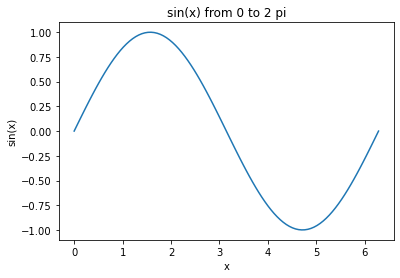

In [158]:
x = np.linspace(0,2*np.pi,100)
y = np.sin(x)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('sin(x) from 0 to 2 pi');


#### Multiple Plots

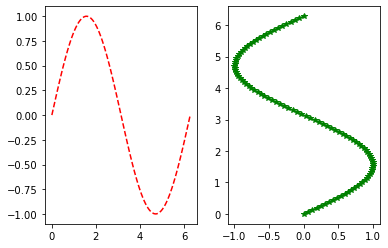

In [159]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--') # More on color options later
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

#### Object Oriented

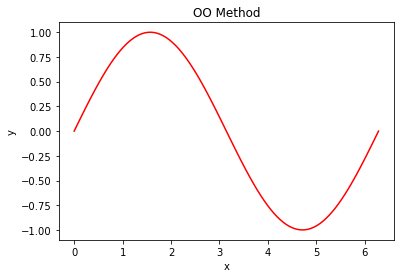

In [160]:
fig,ax = plt.subplots()
ax.plot(x,y,'r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('OO Method');

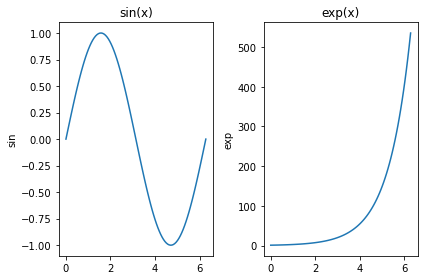

In [161]:
z = np.exp(x)

fig,(ax1,ax2) = plt.subplots(1,2)
ax1.plot(x,y)
ax1.set_title('sin(x)')
ax1.set_ylabel('sin')
ax2.plot(x,z)
ax2.set_title('exp(x)')
ax2.set_ylabel('exp')
plt.tight_layout()

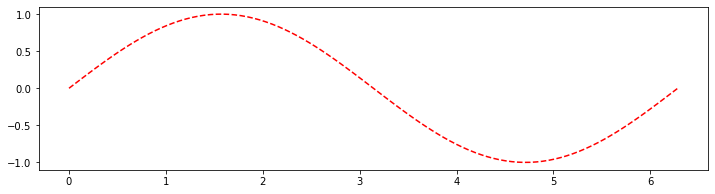

In [162]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r--');

#### Plot with Legend

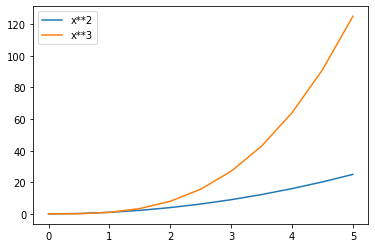

In [163]:
fig,ax = plt.subplots()
x = np.linspace(0, 5, 11)
ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.legend();

#### Set x and y limits

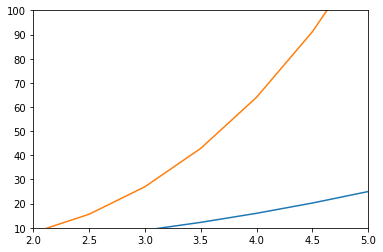

In [164]:
fig,ax = plt.subplots()
x = np.linspace(0, 5, 11)
ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.set_xlim(2,5)
ax.set_ylim(10,100);

#### line color, style, width

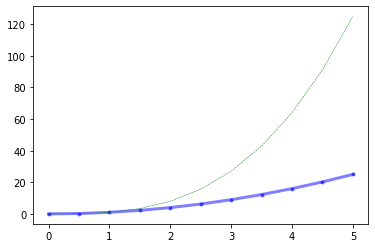

In [165]:
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-',lw = 3,alpha = .5) # blue line with dots, thicker line,half transparent
ax.plot(x, x**3, 'g--', lw = .5); # green dashed line, thinner line

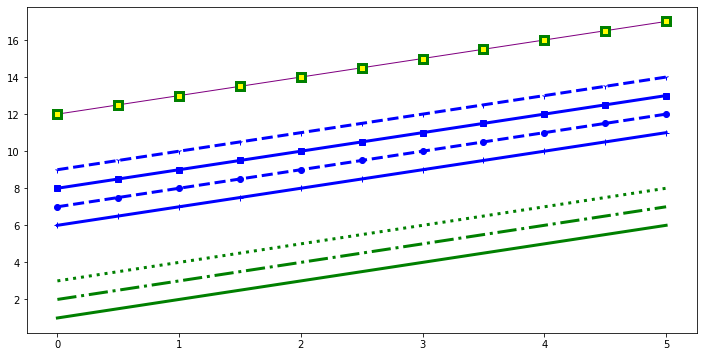

In [166]:
fig, ax = plt.subplots(figsize=(12,6))

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+1, color="green", lw=3, linestyle='-')
ax.plot(x, x+2, color="green", lw=3, ls='-.')
ax.plot(x, x+3, color="green", lw=3, ls=':')

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 6, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+ 7, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+ 8, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+9, color="blue", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+12, color="purple", lw=1, ls='-', marker='s', markersize=8, 
          markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

### Simple curves plots

#### Seaborn

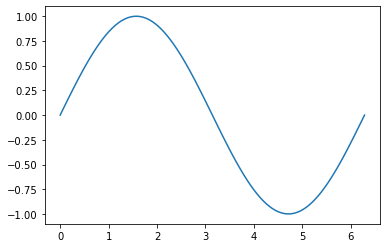

In [167]:
x = np.linspace(0,2*np.pi,100)
y = np.sin(x)
sns.lineplot(x,y);


#### Seaborn set function

https://seaborn.pydata.org/generated/seaborn.set_style.html

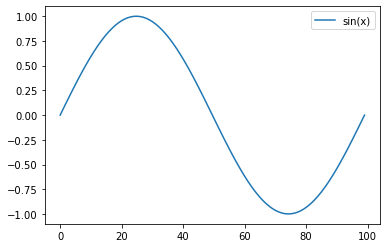

In [168]:
df = pd.DataFrame({'x' : x,'sin(x)':y})
sns.lineplot(data=df);

In [169]:
sns.set_style("whitegrid") # darkgrid, whitegrid, dark, white, ticks

In [170]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

#### Pandas

          x    sin(x)
0  0.000000  0.000000
1  0.063467  0.063424
2  0.126933  0.126592
3  0.190400  0.189251
4  0.253866  0.251148


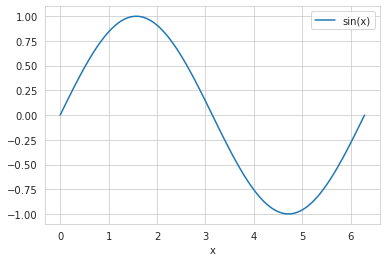

In [171]:
print(df.head())
df.plot(x='x',y='sin(x)',kind = 'line');

In [172]:
sns.set_style("darkgrid")

### Scatter Plot
 
* Compare two variables

#### matplotlib

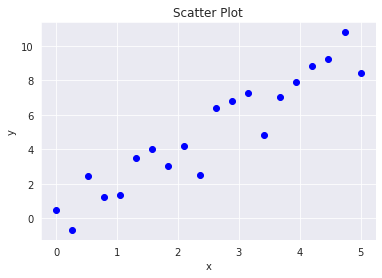

In [173]:
np.random.seed(1234)
x = np.linspace(0,5,20)
y = 2*x + np.random.randn(20)
plt.plot(x,y,'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Scatter Plot");



#### Seaborn

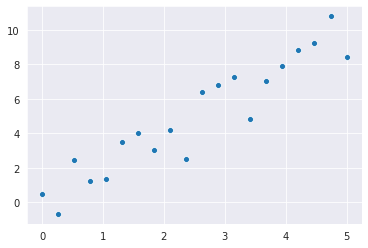

In [174]:
sns.scatterplot(x,y);

#### Seaborn datasets

https://github.com/mwaskom/seaborn-data

In [175]:
tips = sns.load_dataset("tips")
tips.tail(8)

,total_bill,tip,sex,smoker,day,time,size
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


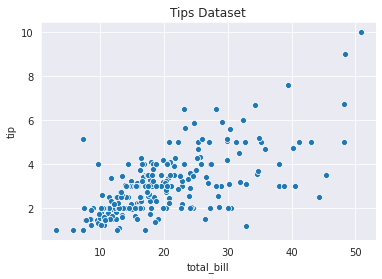

In [176]:
sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.title("Tips Dataset");

#### Pandas

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

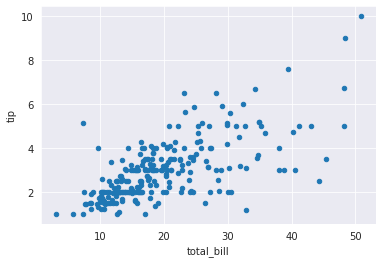

In [177]:
tips.plot(x= 'total_bill', y = 'tip', kind='scatter');

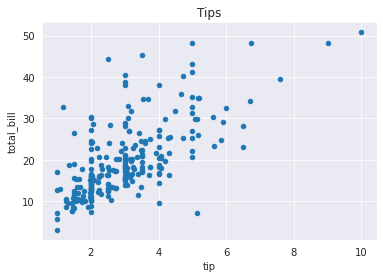

In [178]:
tips.plot(x= 1, y = 0, kind='scatter') # use column index not string
plt.title("Tips");

###  Histogram

* A visual representation of the distribution of a dataset
    + x-axis: the data values
    + y-axis: the frequency of the values in the data
    + bars: group ranges of values or continuous categories on the x-axis

In [179]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### matplotlib

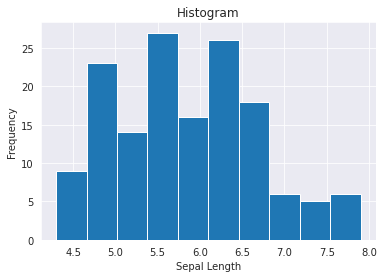

In [180]:
plt.hist(df.sepal_length)
plt.title("Histogram")
plt.xlabel("Sepal Length")
plt.ylabel("Frequency");

#### Seaborn



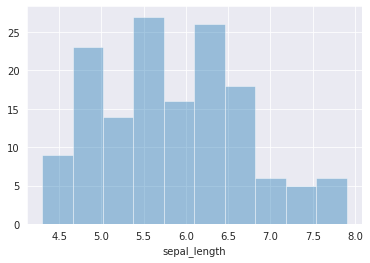

In [181]:
sns.distplot(df.sepal_length,kde=False,bins=10);


#### Pandas

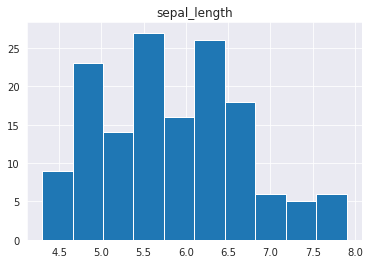

In [182]:
df.hist(column = "sepal_length");

### Box-Plot (Box-and-Whiskers)
 
* 25th and 75th quartiles (bottom and top of box)
* Median - Black line
* Min and max - vertical lines
* Outliers - circles

#### matplotlib

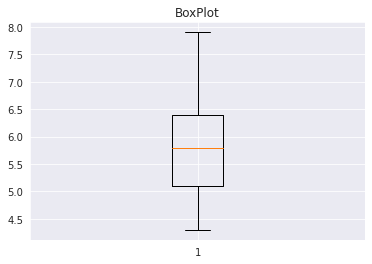

In [183]:

plt.boxplot(df.sepal_length)
plt.title("BoxPlot");


#### Seaborn

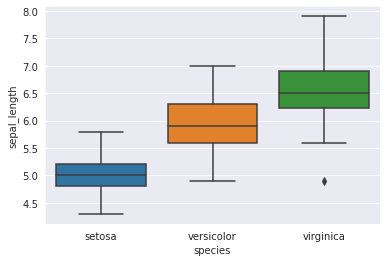

In [184]:
sns.boxplot(x='species',y = 'sepal_length', data = df);

#### Pandas

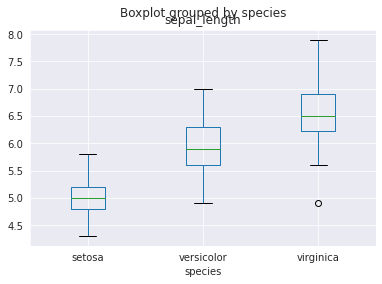

In [185]:
df.boxplot(column="sepal_length",by='species');
